In [32]:
import pathlib
import sys

from mmda.parsers.pdfplumber_parser import PDFPlumberParser
from mmda.predictors.hf_predictors.vila_predictor import IVILAPredictor
from mmda.rasterizers.rasterizer import PDF2ImageRasterizer

pdf_file = "/home/ubuntu/extract-stuff-from-pdfs/extract_citation_mentions/data/4e1c0c02329806b0e7a624c45e14bbf992f8ce2c/pdf.pdf"

pdf_plumber = PDFPlumberParser()
rasterizer = PDF2ImageRasterizer()

doc = pdf_plumber.parse(pdf_file)
doc.annotate_images(rasterizer.rasterize(pdf_file, dpi=72))

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


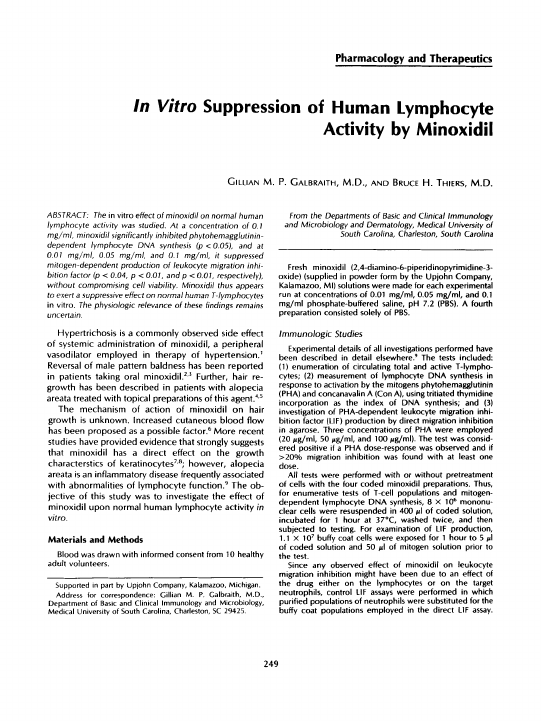

In [33]:
display(doc.images[0])

In [34]:
vila_predictor = IVILAPredictor.from_pretrained(
    "/home/ubuntu/tmp/vila",
    added_special_sepration_token="[BLK]",
    agg_level="row"
)
doc.annotate(vila_spans=vila_predictor.predict(doc))

bibs = "\n\n------------------\n\n".join(
    "".join(sg.symbols)
    # see the link below for mapping between labels and type
    # https://github.com/allenai/spp/blob/183cf4788c7cd4d3592bbe5a338d835702fc65f4/models/vila/server/predictor.py#L13
    for sg in doc.vila_spans if sg.type == 7
)
print(bibs)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:15<00:00,  5.13s/it]

1. Campese VM. Minoxidil: a review of its pharmacological properties and therapeutic use. Drugs. 1981;.?2:257-278.
2. Zappacosta AR. Reversal of baldness in patient receiving minoxidil for hypertension. N Engl I Med. 1980;303:1480.
3. Seidman M, Westfried M, Maxey R;et al. Reversal of male pattern baldness by minoxidil. Cutis. 1981;28:551-553.
4. Weiss VC, West DP, Fu TS, et al. Alopecia areata treated with topical minoxidil. Arch Dermatol. 1984;120:457-463.
5. Fenton DA, Wilkinson ID. Topical minoxidil in the treatment of alopecia areata. Br Med J. 1983;2871015-1017.
6. Burton JL, Marshall A. Hypertrichosis due to minoxidil. Br I Dermatol. 1979;101:593-595.
7. Baden HP, Kubilus 1. Effect of minoxidil on cultured keratin- ocytes. J Invest Dermatol. 1983;81:558-560.
8. Cohen RL, Alves MEAF, Weiss VC, et al. Direct effects of minoxidil on epidermal cells in culture. J Invest Dermatol.
1984;82:90. 9. Galbraith GMP, Thiers BH, Vasily DB, et al. Immunological profiles in alopecia areata. Br